In [206]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RANDOM_SEED = 42

# Specify each path

In [207]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [208]:
NUM_CLASSES = 29

# Dataset reading

In [209]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [210]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [212]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [213]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_26 (Dropout)        (None, 42)                0         
                                                                 
 dense_35 (Dense)            (None, 20)                860       
                                                                 
 dropout_27 (Dropout)        (None, 20)                0         
                                                                 
 dense_36 (Dense)            (None, 10)                210       
                                                                 
 dropout_28 (Dropout)        (None, 10)                0         
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 dense_38 (Dense)            (None, 29)               

In [214]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [215]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [216]:
hist = model.fit(
    x=X_train,
    y=y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback],
    verbose=1,
    shuffle=True
)

Epoch 1/1000
813/818 [============================>.] - ETA: 0s - loss: 2.1105 - accuracy: 0.3939
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
818/818 [==============================] - 2s 1ms/step - loss: 2.1060 - accuracy: 0.3953 - val_loss: 1.1774 - val_accuracy: 0.7617
Epoch 2/1000
153/818 [====>.........................] - ETA: 0s - loss: 1.2777 - accuracy: 0.6475

C:\Users\Michal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


771/818 [===========================>..] - ETA: 0s - loss: 1.0789 - accuracy: 0.6950
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
818/818 [==============================] - 1s 1ms/step - loss: 1.0682 - accuracy: 0.6974 - val_loss: 0.6591 - val_accuracy: 0.8773
Epoch 3/1000
778/818 [===========================>..] - ETA: 0s - loss: 0.7812 - accuracy: 0.7636
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
818/818 [==============================] - 1s 1ms/step - loss: 0.7776 - accuracy: 0.7641 - val_loss: 0.4636 - val_accuracy: 0.9107
Epoch 4/1000
779/818 [===========================>..] - ETA: 0s - loss: 0.6622 - accuracy: 0.7893
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
818/818 [==============================] - 1s 1ms/step - loss: 0.6600 - accuracy: 0.7900 - val_loss: 0.3620 - val_accuracy: 0.9367
Epoch 5/1000
774/818 [===========================>..] - ETA: 0s - loss: 0.5940 - accuracy: 0.8100


In [217]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

137/137 [==============================] - 0s 728us/step - loss: 0.0163 - accuracy: 0.9969


In [218]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [219]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 45ms/step
[5.4217868e-08 8.8151146e-11 6.7909522e-09 1.0251587e-10 8.0744911e-07
 5.6063976e-09 1.1651661e-05 1.4055684e-07 7.2868133e-08 3.2693188e-11
 8.6578990e-07 9.4994646e-12 1.4576913e-11 2.7257027e-04 4.2438862e-07
 8.5110727e-09 7.4996001e-09 1.1063387e-09 6.2035035e-09 1.3647636e-12
 4.4260582e-06 2.5030394e-10 9.1929919e-10 1.2414531e-02 9.8622906e-01
 1.0653315e-03 1.7337848e-10 1.2378351e-14 1.9760764e-09]
24


# Confusion matrix

546/546 [==============================] - 0s 587us/step


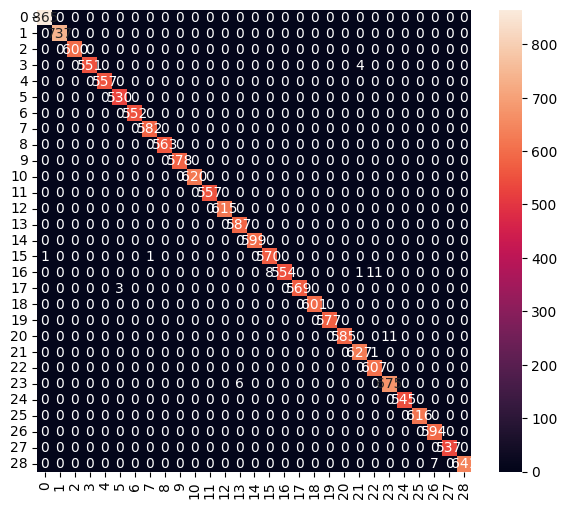

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       865
           1       1.00      1.00      1.00       737
           2       1.00      1.00      1.00       600
           3       1.00      0.99      1.00       555
           4       1.00      1.00      1.00       557
           5       0.99      1.00      1.00       530
           6       1.00      1.00      1.00       552
           7       1.00      1.00      1.00       582
           8       1.00      1.00      1.00       563
           9       1.00      1.00      1.00       578
          10       1.00      1.00      1.00       620
          11       1.00      1.00      1.00       557
          12       1.00      1.00      1.00       615
          13       0.99      1.00      0.99       587
          14       1.00      1.00      1.00       599
          15       0.99      1.00      0.99       572
          16       1.00      0.97      0.98       574
     

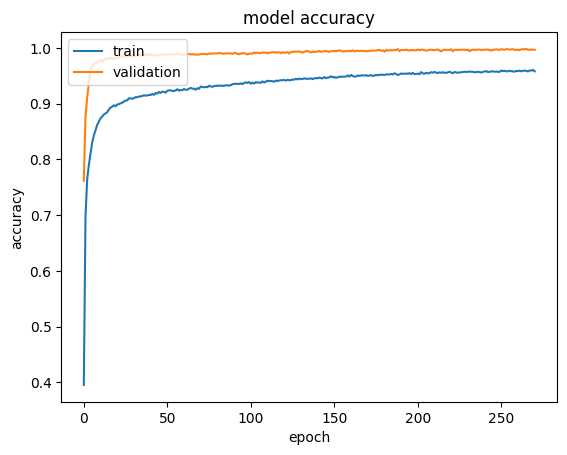

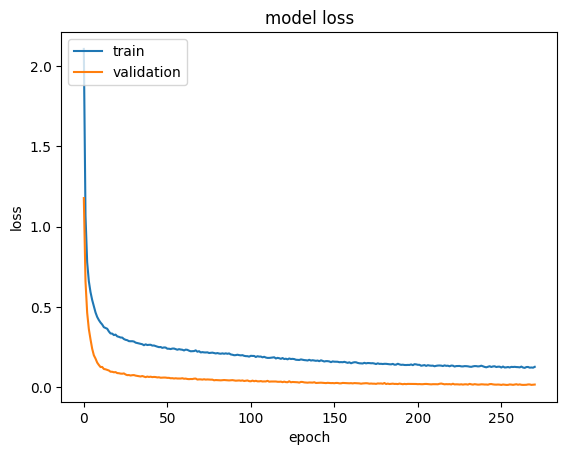

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

    # summarize history for accuracy

    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    plt.close()
    
    # summarize history for loss
    
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    plt.close()

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [221]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Michal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [222]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Michal\AppData\Local\Temp\tmp508lezvr\assets


INFO:tensorflow:Assets written to: C:\Users\Michal\AppData\Local\Temp\tmp508lezvr\assets


8892

# Inference test

In [223]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [224]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [225]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [226]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [227]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.42178675e-08 8.81508130e-11 6.79095224e-09 1.02515475e-10
 8.07448259e-07 5.60637670e-09 1.16516276e-05 1.40556153e-07
 7.28681329e-08 3.26931850e-11 8.65790696e-07 9.49944724e-12
 1.45768848e-11 2.72570236e-04 4.24387395e-07 8.51103810e-09
 7.49957074e-09 1.10633858e-09 6.20350304e-09 1.36476095e-12
 4.42605779e-06 2.50302945e-10 9.19295695e-10 1.24145187e-02
 9.86229062e-01 1.06533035e-03 1.73378145e-10 1.23783023e-14
 1.97607619e-09]
24
